<span style="color:orange">

**import required libraries**

In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt

<span style="color:brown">

# **I. PREPARING DATA**

<span style="color:orange">

**load in dataset, print head**

In [11]:
bears = pd.read_csv("bears.csv")
bears.head()
len(bears)

155

<span style="color:orange">

**split dataset by species**

In [3]:
polar = bears[bears["species"]=="polar"]
brown = bears[bears["species"]=="brown"]
american = bears[bears["species"]=="american"]
asian = bears[bears["species"]=="asian"]
sun = bears[bears["species"]=="sun"]
sloth  = bears[bears["species"]=="sloth"]

<span style="color:brown">

# **II. VISUALIZATIONS**

<span style="color:orange">

**first, plot all data**

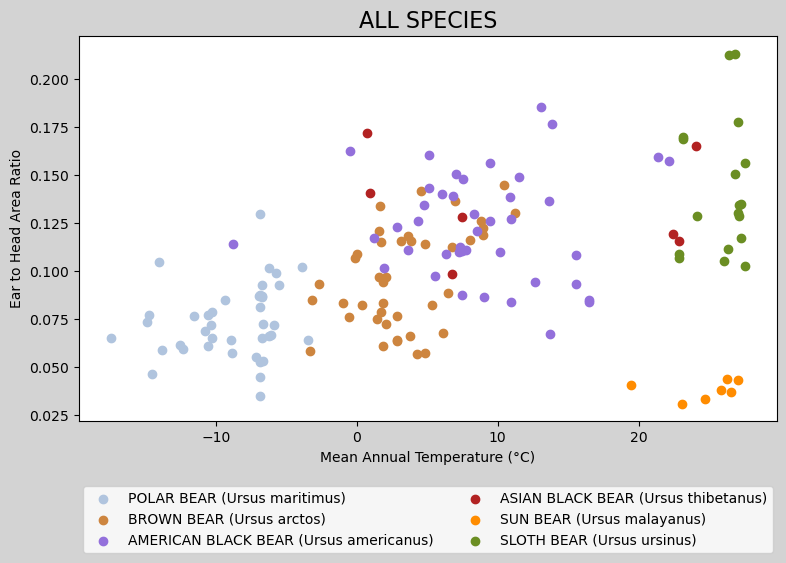

In [4]:
colors = ["lightsteelblue","peru","mediumpurple","firebrick","darkorange","olivedrab"]
species = ["POLAR BEAR (Ursus maritimus)","BROWN BEAR (Ursus arctos)",
           "AMERICAN BLACK BEAR (Ursus americanus)","ASIAN BLACK BEAR (Ursus thibetanus)",
           "SUN BEAR (Ursus malayanus)","SLOTH BEAR (Ursus ursinus)"]

plt.figure(figsize=(9,5)).set_facecolor("lightgray")
plt.title("ALL SPECIES",fontsize=16)
plt.xlabel("Mean Annual Temperature (°C)")
plt.ylabel("Ear to Head Area Ratio")
for i,df in enumerate([polar,brown,american,asian,sun,sloth]):
    plt.scatter(df["temp"],df["ear:head"],color=colors[i],label=species[i])
plt.legend(ncols=2,loc='upper center',bbox_to_anchor=(0.5, -0.15))
plt.show()

<span style="color:olive">

note the general positive trend of the data... this already seems to suggest Allen's Rule in bears! species are characteristically clumped by temperature, with some overlap. sun bear is already a clear outlier to the trend seen in the graph.

<span style="color:orange">

**next, plot each species individually**

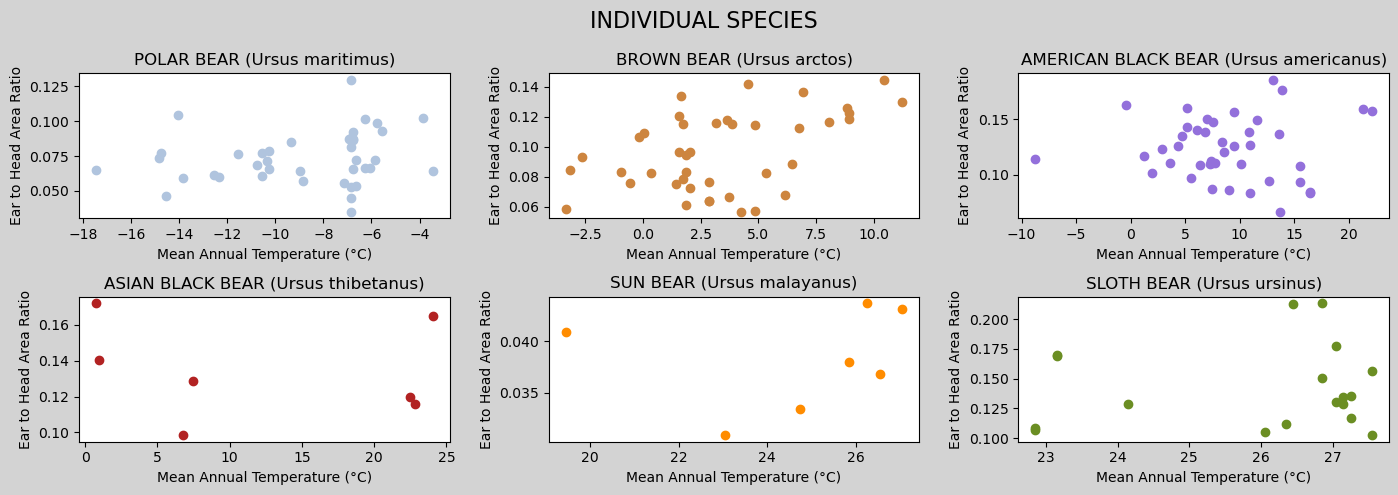

In [5]:
plt.figure(figsize=(14,5)).set_facecolor("lightgray")
plt.suptitle("INDIVIDUAL SPECIES",fontsize=16)
for i,df in enumerate([polar,brown,american,asian,sun,sloth]):
    plt.subplot(2,3,i+1)
    plt.title(species[i])
    plt.xlabel("Mean Annual Temperature (°C)")
    plt.ylabel("Ear to Head Area Ratio")
    plt.scatter(df["temp"],df["ear:head"],color=colors[i])
plt.tight_layout()
plt.show()

<span style="color:olive">

asian black bear, sun bear, and sloth bear seem to not have enough points and/or enough temperature variation to test Allen's Rule.

<span style="color:brown">

# **III. DATA ANALYSIS**

<span style="color:orange">

**first, I will repeat the above graphs with best-fit lines and R^2 values**

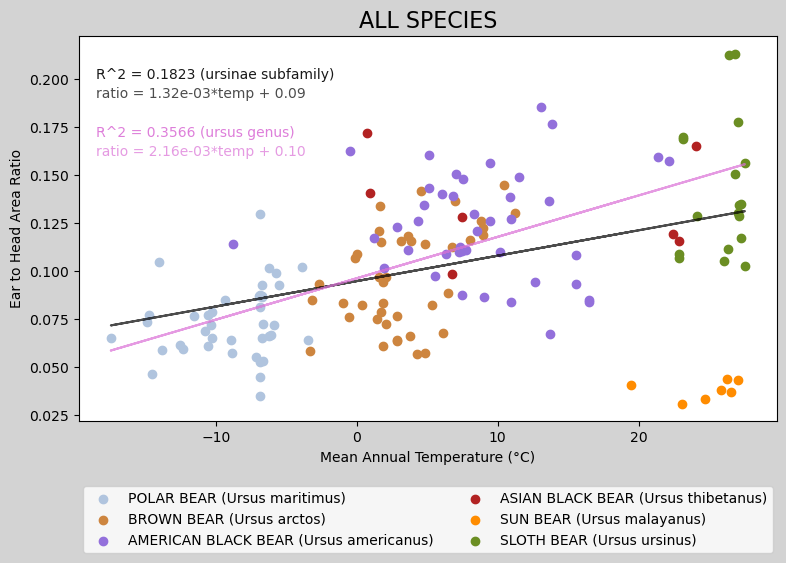

In [6]:
plt.figure(figsize=(9,5)).set_facecolor("lightgray")
plt.title("ALL SPECIES",fontsize=16)
plt.xlabel("Mean Annual Temperature (°C)")
plt.ylabel("Ear to Head Area Ratio")
for i,df in enumerate([polar,brown,american,asian,sun,sloth]):
    plt.scatter(df["temp"],df["ear:head"],color=colors[i],label=species[i])
plt.legend(ncols=2,loc='upper center',bbox_to_anchor=(0.5, -0.15))

m, b, r_value, p_value, std_err = scipy.stats.linregress(bears["temp"],bears["ear:head"])
plt.plot(bears["temp"],m*bears["temp"]+b,color="black",alpha=0.7)
plt.annotate(f"R^2 = {r_value**2:.4f} (ursinae subfamily)", xy=(-18.5,0.2),color="black",alpha=0.9)
plt.annotate(f"ratio = {m:.2e}*temp + {b:.2f}",xy=(-18.5,0.19),color="black",alpha=0.7)

m, b, r_value, p_value, std_err = scipy.stats.linregress(bears[(bears["species"]!="sun")&(bears["species"]!="sloth")]["temp"],bears[(bears["species"]!="sun")&(bears["species"]!="sloth")]["ear:head"])
plt.plot(bears["temp"],m*bears["temp"]+b,color="orchid",alpha=0.7)
plt.annotate(f"R^2 = {r_value**2:.4f} (ursus genus)", xy=(-18.5,0.17),color="orchid",alpha=0.9)
plt.annotate(f"ratio = {m:.2e}*temp + {b:.2f}",xy=(-18.5,0.16),color="orchid",alpha=0.7)

plt.show()

<span style="color:olive">

as described earlier, sun bears are a clear outlier, that effect the best-fit line when sun bears and sloth bears are removed for the ursus analysis.
both best-fit lines are positive in slope. when I remove sun bears and sloth bears from the computation, the R^2 indicates a moderate rather than weak correlation, and the slope increases.

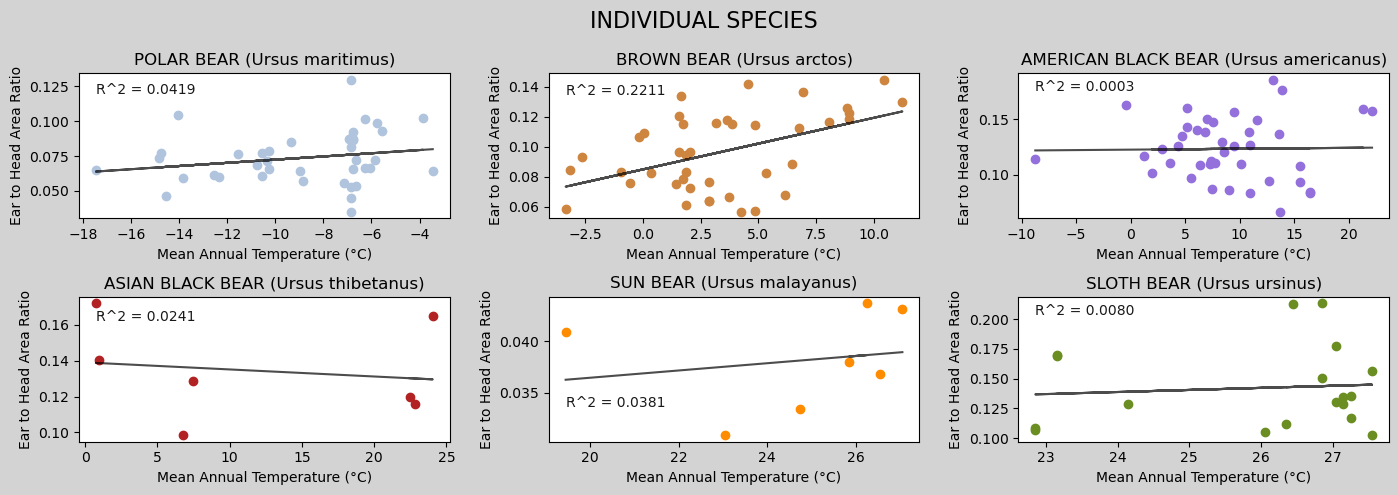

In [7]:
plt.figure(figsize=(14,5)).set_facecolor("lightgray")
plt.suptitle("INDIVIDUAL SPECIES",fontsize=16)
for i,df in enumerate([polar,brown,american,asian,sun,sloth]):
    plt.subplot(2,3,i+1)
    plt.title(species[i])
    plt.xlabel("Mean Annual Temperature (°C)")
    plt.ylabel("Ear to Head Area Ratio")
    plt.scatter(df["temp"],df["ear:head"],color=colors[i])

    m, b, r_value, p_value, std_err = scipy.stats.linregress(df["temp"],df["ear:head"])
    plt.plot(df["temp"],m*df["temp"]+b,color="black",alpha=0.7)
    plt.annotate(f"R^2 = {r_value**2:.4f}", xy=(np.min(df["temp"]),np.max(df["ear:head"])-0.01),color="black",alpha=0.9)

plt.tight_layout()
plt.show()

<span style="color:olive">

as breifly mentioned in the exploratory analysis, the asain black bear, sun bear, and sloth bear have too little datapoints and/or temperature variation to conclude any correlations. the american black bear and polar bear species have significant temperature variation, but both the slope and the R^2 value suggests there is no correlation between mean annual temperature and ear to head area ratios. for the brown bear, the positive slope and the R^2 value suggest a weak positive correlation between mean annual temperature and ear to head area ratios.

<span style="color:orange">

**regression t-tests**

In [8]:
_, _, r_val, p_val, _ = scipy.stats.linregress(bears["temp"],bears["ear:head"])
print(f"ursinae subfamily: r-value = {r_val:.3f}, p-value = {p_val:.4e}")

_, _, r_val, p_val, _ = scipy.stats.linregress(bears[(bears["species"]!="sun")&(bears["species"]!="sloth")]["temp"],bears[(bears["species"]!="sun")&(bears["species"]!="sloth")]["ear:head"])
print(f"ursus genus: r-value = {r_val:.3f}, p-value = {p_val:.4e}")
print()

for i,df in enumerate([polar,brown,american,asian,sun,sloth]):
    _, _, r_val, p_val, _ = scipy.stats.linregress(df["temp"],df["ear:head"])
    print(f"{species[i]}: r-value = {r_val:.4f}, p-value = {p_val:.4e}")

ursinae subfamily: r-value = 0.427, p-value = 3.0097e-08
ursus genus: r-value = 0.597, p-value = 6.4507e-14

POLAR BEAR (Ursus maritimus): r-value = 0.2047, p-value = 2.0518e-01
BROWN BEAR (Ursus arctos): r-value = 0.4702, p-value = 1.9228e-03
AMERICAN BLACK BEAR (Ursus americanus): r-value = 0.0166, p-value = 9.1690e-01
ASIAN BLACK BEAR (Ursus thibetanus): r-value = -0.1554, p-value = 7.3937e-01
SUN BEAR (Ursus malayanus): r-value = 0.1952, p-value = 6.7494e-01
SLOTH BEAR (Ursus ursinus): r-value = 0.0892, p-value = 7.2482e-01


<span style="color:olive">

we can reach the same conclusions as aforementioned. there is a correlation between mean annual temperature and ear to head area ratios for all bear species, and this correlation becomes stronger when just the ursus genus are considered. for the brown bear, there is statistically significant evidence that suggests there is a positive, weak to moderate, correlation between the values. for other species, there is not statistically significant evidence that suggests a correlation does not exist; in other words, we can not reject that there is no correlation.

<span style="color:brown">

# **extra**

<span style="color:orange">

**residual graphs for all species fits**

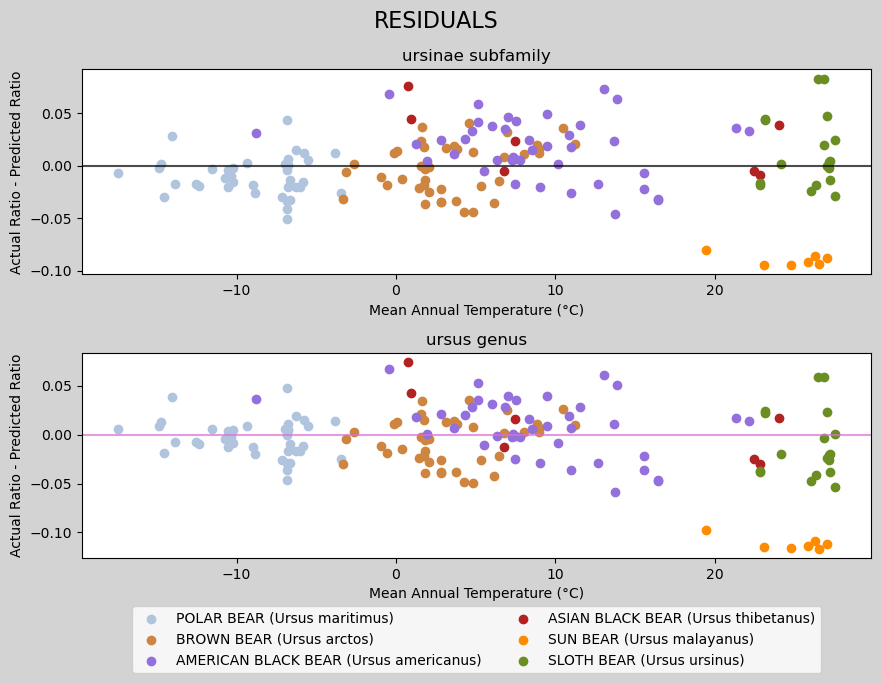

In [9]:
plt.figure(figsize=(9,7)).set_facecolor("lightgray")
plt.suptitle("RESIDUALS",fontsize=16)

plt.subplot(2,1,1)
plt.title("ursinae subfamily")
plt.xlabel("Mean Annual Temperature (°C)")
plt.ylabel("Actual Ratio - Predicted Ratio")
m, b, r_value, p_value, std_err = scipy.stats.linregress(bears["temp"],bears["ear:head"])
for i,df in enumerate([polar,brown,american,asian,sun,sloth]):
    plt.scatter(df["temp"],df["ear:head"]-(m*df["temp"]+b),color=colors[i],label=species[i])
plt.axhline(color="black",alpha=0.7)

plt.subplot(2,1,2)
plt.title("ursus genus")
plt.xlabel("Mean Annual Temperature (°C)")
plt.ylabel("Actual Ratio - Predicted Ratio")
m, b, r_value, p_value, std_err = scipy.stats.linregress(bears[(bears["species"]!="sun")&(bears["species"]!="sloth")]["temp"],bears[(bears["species"]!="sun")&(bears["species"]!="sloth")]["ear:head"])
for i,df in enumerate([polar,brown,american,asian,sun,sloth]):
    plt.scatter(df["temp"],df["ear:head"]-(m*df["temp"]+b),color=colors[i],label=species[i])
plt.legend(ncols=2,loc='upper center',bbox_to_anchor=(0.5, -0.2))
plt.axhline(color="orchid",alpha=0.7)

plt.tight_layout()
plt.show()

<span style="color:orange">

**all best-fit lines in analysis overplotted**

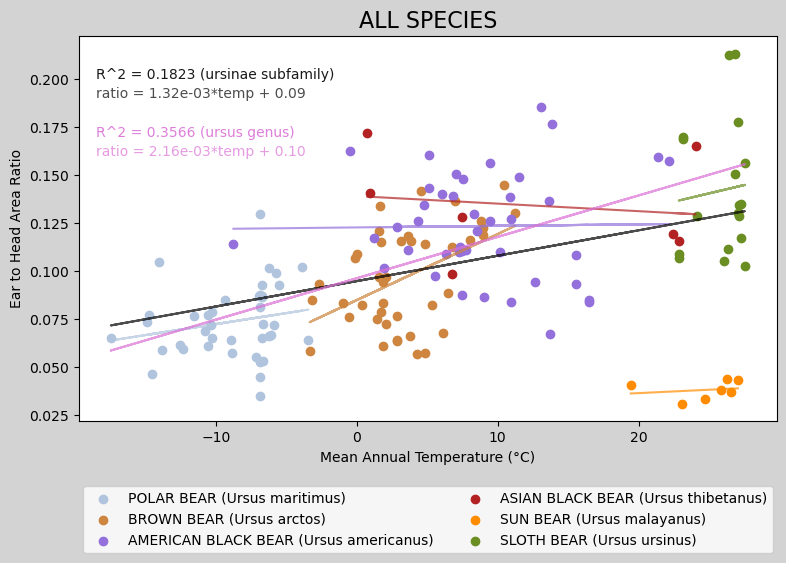

In [10]:
plt.figure(figsize=(9,5)).set_facecolor("lightgray")
plt.title("ALL SPECIES",fontsize=16)
plt.xlabel("Mean Annual Temperature (°C)")
plt.ylabel("Ear to Head Area Ratio")
for i,df in enumerate([polar,brown,american,asian,sun,sloth]):
    m, b, r_value, p_value, std_err = scipy.stats.linregress(df["temp"],df["ear:head"])
    plt.scatter(df["temp"],df["ear:head"],color=colors[i],label=species[i])
    plt.plot(df["temp"],m*df["temp"]+b,color=colors[i],alpha=0.7)
plt.legend(ncols=2,loc='upper center',bbox_to_anchor=(0.5, -0.15))

m, b, r_value, p_value, std_err = scipy.stats.linregress(bears["temp"],bears["ear:head"])
plt.plot(bears["temp"],m*bears["temp"]+b,color="black",alpha=0.7)
plt.annotate(f"R^2 = {r_value**2:.4f} (ursinae subfamily)", xy=(-18.5,0.2),color="black",alpha=0.9)
plt.annotate(f"ratio = {m:.2e}*temp + {b:.2f}",xy=(-18.5,0.19),color="black",alpha=0.7)

m, b, r_value, p_value, std_err = scipy.stats.linregress(bears[(bears["species"]!="sun")&(bears["species"]!="sloth")]["temp"],bears[(bears["species"]!="sun")&(bears["species"]!="sloth")]["ear:head"])
plt.plot(bears["temp"],m*bears["temp"]+b,color="orchid",alpha=0.7)
plt.annotate(f"R^2 = {r_value**2:.4f} (ursus genus)", xy=(-18.5,0.17),color="orchid",alpha=0.9)
plt.annotate(f"ratio = {m:.2e}*temp + {b:.2f}",xy=(-18.5,0.16),color="orchid",alpha=0.7)

plt.show()

---